     Gender  Age  Sleep Duration  Sleep Quality  Physical Activity  \
0         1   27             6.1              6                 42   
1         1   28             6.2              6                 60   
2         1   28             6.2              6                 60   
3         1   28             5.9              4                 30   
4         1   28             5.9              4                 30   
..      ...  ...             ...            ...                ...   
369       0   59             8.1              9                 75   
370       0   59             8.0              9                 75   
371       0   59             8.1              9                 75   
372       0   59             8.1              9                 75   
373       0   59             8.1              9                 75   

     Stress Level  BMI  Heart Rate  Daily Steps  
0               6    1          77         4200  
1               8    0          75        10000  
2        

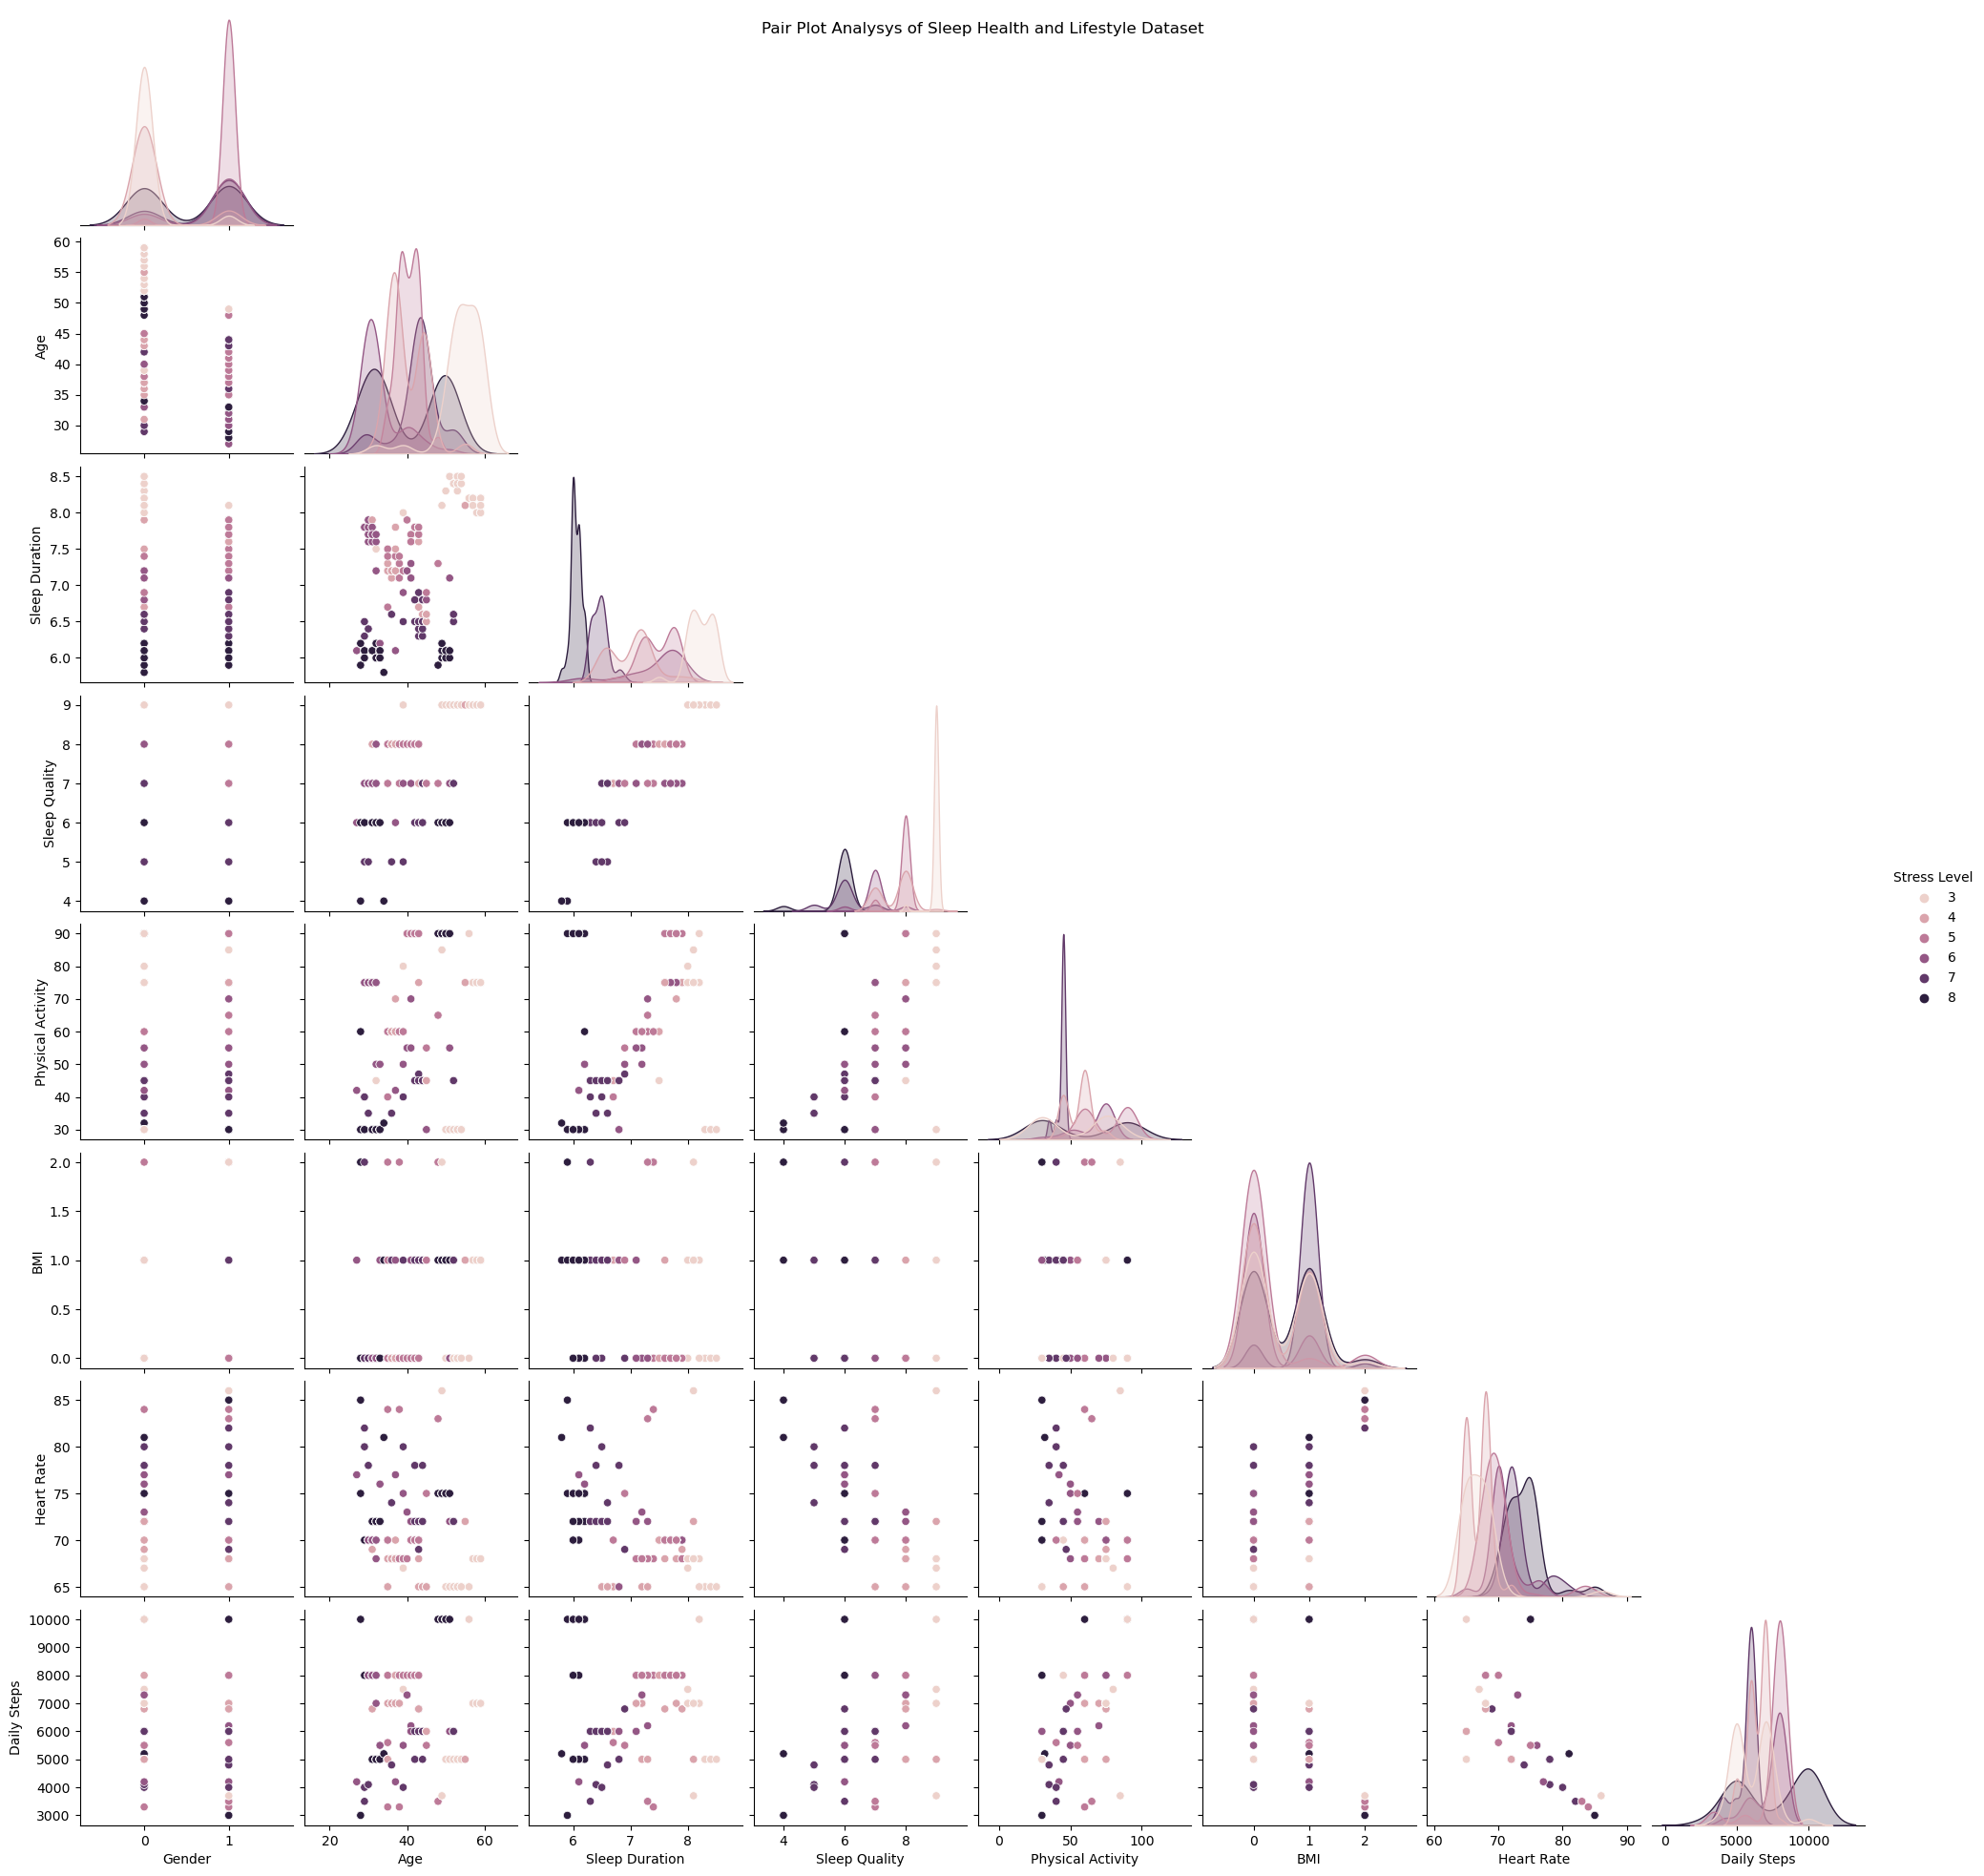

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# import OneHotEncoding from sklearn.preprocessing

# Read in the data
df = pd.read_csv('sleep_health_and_lifestyle_dataset.csv')

# Drop data we're not using
data = df.copy().drop(['Person ID', 'Occupation', 'Sleep Disorder', 'Blood Pressure'], axis = 1)

# Rename columns
data.rename(columns = {'BMI Category': 'BMI', 'Quality of Sleep': 'Sleep Quality', 'Physical Activity Level': 'Physical Activity'}, inplace = True)

# Convert BMI normal weight -> normal
data['BMI'] = np.where(data['BMI'] == 'Normal Weight', 'Normal', data['BMI'])


# Convert BMI strings to numbers
data['BMI'].replace(["Normal", "Overweight", "Obese"], [0, 1, 2], inplace=True)

# Convert categorical data to numerical data
# Convert Gender Strings to Numbers: Male to 0 and Female to 1
data['Gender'] = np.where(data['Gender'] == 'Male', 1, 0)

print(data)

# age, sleep duration, sleep quality, stress level heart rate, blood pressure

pp = sns.pairplot(data, hue='Stress Level', corner = True)
pp.fig.suptitle("Pair Plot Analysys of Sleep Health and Lifestyle Dataset")
plt.show()


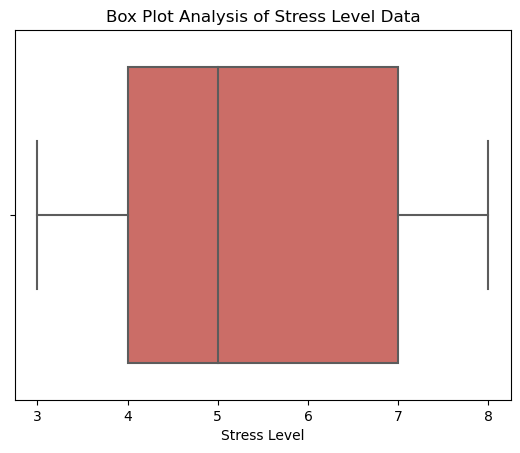

In [7]:
# Box plot of stress level
sns.boxplot(x = 'Stress Level', data=df, palette = 'hls')
plt.title("Box Plot Analysis of Stress Level Data")
plt.show()

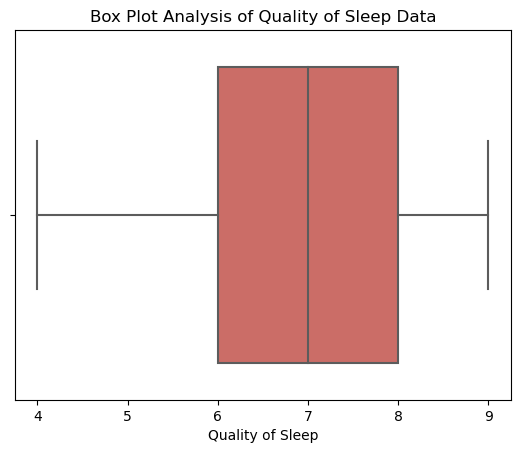

In [8]:
# Box plot of quality of sleep
sns.boxplot(x = 'Quality of Sleep', data=df, palette = 'hls')
plt.title("Box Plot Analysis of Quality of Sleep Data")
plt.show()

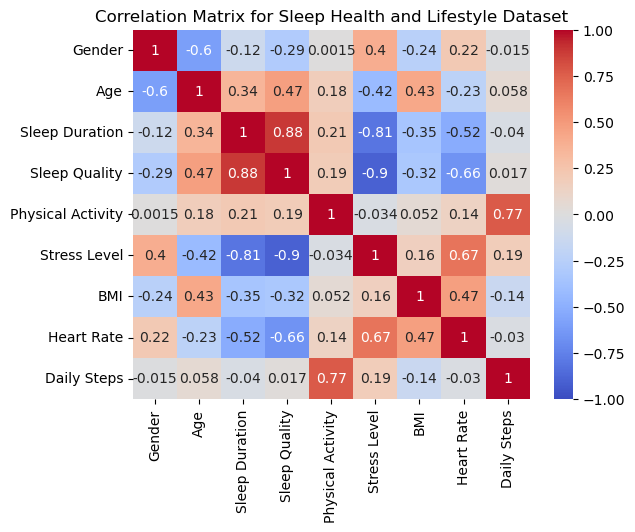

In [9]:
# Correlation Matrix
sns.heatmap(data.corr(), vmin = -1, vmax = 1, center = 0, annot = True, cmap = "coolwarm")
plt.title("Correlation Matrix for Sleep Health and Lifestyle Dataset")
plt.show()

In [23]:
# from sklearn.preprocessing import MinMaxScaler

# # Create a MinMaxScalar object
# scaler = MinMaxScaler(feature_range=(0, 1))
# data_Rescaled = scaler.fit_transform(data)
# data_Rescaled = pd.DataFrame(data=data_Rescaled, columns=data.columns)
# print(data_Rescaled)

# fig, axes = plt.subplots(3, 3, figsize=(20, 20))
# axes = axes.flatten()

# i = 0
# for item in data_Rescaled.items():
#     sns.histplot(item, kde=True, ax=axes[i], binwidth=0.2)
#     i += 1